# Exercise2-3: MNIST Classification

# Import library

In [0]:
import numpy as np
import chainer
from chainer import iterators, optimizers, training
from chainer.training import extensions
import chainer.functions as F
import chainer.links as L


%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

from chainer.datasets import mnist
from chainer.datasets import split_dataset_random

# Define def

In [0]:
def train(batchsize = 128,  max_epoch = 5, loss_png='loss.png', accuracy_png='accuracy.png'):
    # Data set
    train_val, test = mnist.get_mnist(withlabel=True, ndim=3)
    train, valid = split_dataset_random(train_val, 50000, seed=0)
    
    # Iterator    
    train_iter = iterators.SerialIterator(train, batchsize)
    valid_iter = iterators.SerialIterator(valid, batchsize, repeat=False, shuffle=False)
    
    # Model
    net = L.Classifier(model)
    
    # Optimizar
    optimizer = optimizers.SGD(lr=0.01).setup(net)
    
    # Updater
    updater = training.StandardUpdater(train_iter, optimizer, device=gpu_id) # CPU=-1
    
    # Trainer
    trainer = training.Trainer(updater, (max_epoch, 'epoch'), out='mnist_result')
    
    # Trainer extensions
    trainer.extend(extensions.LogReport())
    trainer.extend(extensions.Evaluator(valid_iter, net, device=gpu_id), name='val')
    trainer.extend(extensions.snapshot(filename='snapshot_epoch-{.updater.epoch}'))
    trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'main/accuracy', 'val/main/loss', 'val/main/accuracy', 'elapsed_time']))
    trainer.extend(extensions.PlotReport(['main/loss', 'val/main/loss'], x_key='epoch', file_name=loss_png))
    trainer.extend(extensions.PlotReport(['main/accuracy', 'val/main/accuracy'], x_key='epoch', file_name=accuracy_png))

    trainer.run()  

# Case-5 CNN 
* 3*3 filter
* 8 output

In [3]:
class MLP(chainer.Chain):
    def __init__(self):
        super(MLP, self).__init__()

        #  Initialization of layers
        with self.init_scope():
            self.conv1 = L.Convolution2D(None, 8, 3)
            self.l1 = L.Linear(None, 10)

    def __call__(self, x):
        # Forward computation by __call__
        h = F.tanh(self.conv1(x))
        y = self.l1(h)
        return y


gpu_id = 0  # Set to -1 if you use CPU

model = MLP()
if gpu_id >= 0:
    model.to_gpu(gpu_id)

train(batchsize = 128,  max_epoch = 5, loss_png='loss.png', accuracy_png='accuracy.png')

epoch       main/loss   main/accuracy  val/main/loss  val/main/accuracy  elapsed_time
1           0.64143     0.84385        0.393698       0.892108           3.97879       
2           0.361789    0.898497       0.339056       0.902492           6.15979       
3           0.32494     0.90639        0.313602       0.90981            8.26456       
4           0.305138    0.911465       0.300406       0.914557           10.3716       
5           0.292358    0.915681       0.28822        0.918513           12.4679       


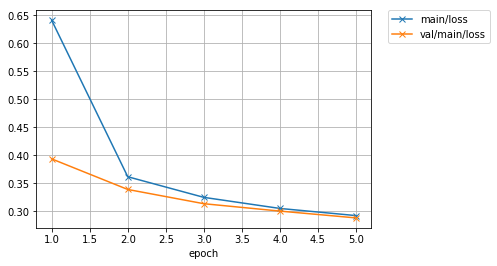

In [4]:
Image(filename='mnist_result/loss.png') 

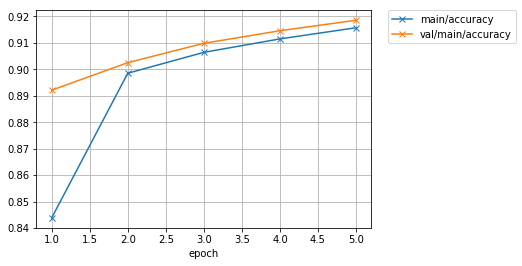

In [5]:
Image(filename='mnist_result/accuracy.png')

# Try other case
* h = F.relu(h)
* h = F.max_pooling_2d(h, 2)